In [1]:
import os
import glob
import lsst.eotest.image_utils as imutils
import lsst.eotest.sensor as sensorTest
import matplotlib.pyplot as plt
import numpy as np
import yaml
import sys
sys.path.insert(0, '../')
import ccob_utils as u
import ccob_beam as b
import pickle
%load_ext autoreload
%autoreload 2 

In [2]:
eotest_results_path = '/gpfs/slac/lsst/fs1/g/data/jobHarness/jh_archive-test/LCA-11021_RTM/LCA-11021_RTM-006-Dev/5867D/collect_raft_results/v0/38904'
tmp_dir = '/home/combet/tmp_new'

In [254]:
slot_names = ['11']
band_names = ['red']
slac_freq_names = ['0620']
path_ccob_flat = '/home/combet/tmp_new'
path_slac_flat_root = '/gpfs/slac/lsst/fs1/g/data/jobHarness/jh_archive-test/LCA-11021_RTM/LCA-11021_RTM-006-Dev/5867D/qe_raft_acq/v0/38892/'
slac_freq = slac_freq_names[0]

path_slac_flat = os.path.join(path_slac_flat_root,'S'+slot_names[0])
slac_flat = glob.glob(os.path.join(path_slac_flat,'*lambda_flat_'+slac_freq_names[0]+'*'))[0]
ccob_flat = os.path.join(path_ccob_flat, slot_names[0]+'_CCOB_QE_'+band_names[0]+'.fits')
ccd_slac_flat = sensorTest.MaskedCCD(slac_flat)
ccd_ccob_flat = sensorTest.MaskedCCD(ccob_flat)

                         
                         
eotest_results_file = os.path.join(eotest_results_path, '{}_eotest_results.fits'.format(ccd_slac_flat.md('LSST_NUM')))
gains = u.gains(eotest_results_file)
image = {}
for amp in ccd_slac_flat:
    image[amp] = ccd_slac_flat.bias_subtracted_image(amp)
    image[amp] *= gains[amp]

outfile = os.path.join(tmp_dir,slac_freq_names[0]+'_slac_flat.fits')
imutils.writeFits({amp: image[amp].getImage() for amp in ccd_slac_flat}, outfile, slac_flat)



14193.0
14215.0
14190.0
14176.0
14221.0
14214.0
14227.0
14206.0
14211.0
14228.0
14200.0
14215.0
14192.0
14207.0
14186.0
14190.0


In [255]:
ccd_slac_flat = sensorTest.MaskedCCD(os.path.join(tmp_dir,slac_freq_names[0]+'_slac_flat.fits'))

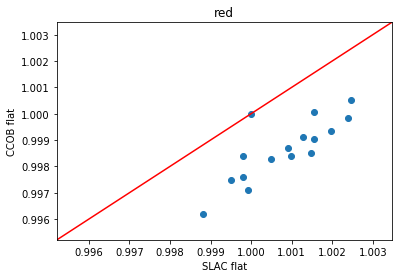

In [256]:
ref_slac = np.median(ccd_slac_flat[1].getImage().getArray())
ref_ccob = np.median(ccd_ccob_flat[1].getImage().getArray())
res_slac = np.zeros(len(ccd_slac_flat))
res_ccob = np.zeros(len(ccd_slac_flat))
for i,amp in enumerate(ccd_slac_flat):
    res_slac[i] = np.median(ccd_slac_flat[amp].getImage().getArray())/ref_slac
    res_ccob[i] = np.median(ccd_ccob_flat[amp].getImage().getArray())/ref_ccob

xmin = np.min([res_slac, res_ccob])*0.999
xmax = np.max([res_slac, res_ccob])*1.001
ymin = np.min([res_slac, res_ccob])*0.999
ymax = np.max([res_slac, res_ccob])*1.001

plt.scatter(res_slac, res_ccob)
plt.plot([xmin, xmax],[ymin, ymax], color='red')
plt.xlim([xmin, xmax])
plt.ylim([ymin,ymax])
plt.xlabel("SLAC flat")
plt.ylabel("CCOB flat")
plt.title(band_names[0])



In [257]:
slac_flat_image, dumm_slac = u.make_ccd_2d_array(slac_flat, gains=gains)
ccob_flat_image, dumm_ccob = u.make_ccd_2d_array(ccob_flat)

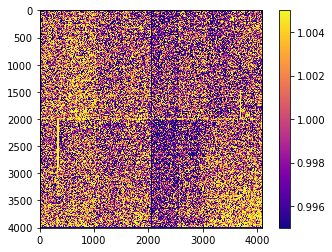

In [267]:
plt.imshow(ccob_flat_image/ref_ccob, vmin=0.995, vmax=1.005, cmap='plasma')
plt.colorbar()

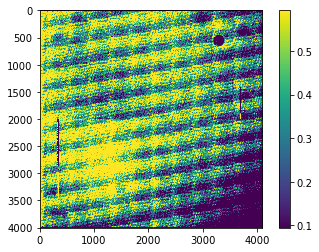

In [253]:
import scipy.ndimage as sc

slac_qe = slac_flat_image/ref_slac
ccob_qe = ccob_flat_image/ref_ccob
res = sc.uniform_filter((slac_qe-ccob_qe)*100/(slac_qe), 10)
vmin = np.mean(res) - 0.2*np.std(res)
vmax = np.mean(res) + 0.2*np.std(res)
plt.imshow(res, vmin=vmin, vmax=vmax)
plt.colorbar()


['/gpfs/slac/lsst/fs1/g/data/jobHarness/jh_archive-test/LCA-11021_RTM/LCA-11021_RTM-006-Dev/5867D/qe_raft_acq/v0/38892/S11/E2V-CCD250-131-Dev_lambda_flat_0950_5867D_20180417042945.fits']


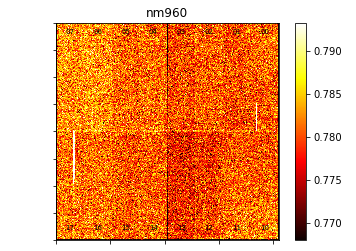

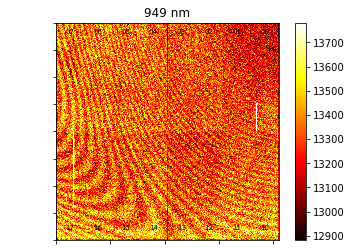

In [35]:
%matplotlib inline
slot_names = ['11']
#band_names = ['nm960','nm850','nm750','red','blue','uv']
#slac_freq_names = ['0950','0850','0750','0620','0450','0375']
band_names = ['nm960']
slac_freq_names = ['0950']

path_ccob_flat = '/home/combet/tmp_new'
path_slac_flat_root = '/gpfs/slac/lsst/fs1/g/data/jobHarness/jh_archive-test/LCA-11021_RTM/LCA-11021_RTM-006-Dev/5867D/qe_raft_acq/v0/38892/'

for slot in slot_names:
    for i,band in enumerate(band_names):
        slac_freq = slac_freq_names[i]
        path_slac_flat = os.path.join(path_slac_flat_root,'S'+slot)
        print(glob.glob(os.path.join(path_slac_flat,'*lambda_flat_'+slac_freq+'*')))
        slac_flat = glob.glob(os.path.join(path_slac_flat,'*lambda_flat_'+slac_freq+'*'))[0]
        ccd = sensorTest.MaskedCCD(slac_flat)
        eotest_results_file = os.path.join(eotest_results_path, '{}_eotest_results.fits'.format(ccd.md('LSST_NUM')))
        gains = u.gains(eotest_results_file)
        sensorTest.plot_flat(os.path.join(path_ccob_flat, slot+'_CCOB_QE_'+band+'.fits'), title=band, nsig=3)
        sensorTest.plot_flat(slac_flat, nsig=3, gains = gains)

In [4]:
os.path.join(path_slac_flat,'*lambda_flat_'+slac_freq)

'/gpfs/slac/lsst/fs1/g/data/jobHarness/jh_archive-test/LCA-11021_RTM/LCA-11021_RTM-006-Dev/5867D/qe_raft_acq/v0/38892/S11/*lambda_flat_0375'